In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [3]:
import pandas_profiling as pp

In [253]:
from sklearn.linear_model import LogisticRegressionCV

In [246]:
from sklearn.model_selection import train_test_split

In [269]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [4]:
%%time
#loading datasets
diabetic_data = pd.read_csv('diabetic_data.csv')
patient_details = pd.read_excel('Paitent_details.xlsx')
lab_session = pd.read_excel('Lab-session.xlsx')
diagnosis_session = pd.read_excel('Diagnosis_session.xlsx')
admission_details = pd.read_excel('admission_details.xlsx')

CPU times: user 22 s, sys: 120 ms, total: 22.1 s
Wall time: 22.1 s


In [5]:
diabetic_data.head()

,encounter_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,None,None,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,NO
1,149190,None,None,No,No,No,No,No,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,None,None,No,No,No,No,No,No,Steady,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,None,None,No,No,No,No,No,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,None,None,No,No,No,No,No,No,Steady,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
diabetic_data.T

,0,1,2,3,4,5,6,7,8,9,...,101756,101757,101758,101759,101760,101761,101762,101763,101764,101765
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,...,443842070,443842136,443842340,443842778,443847176,443847548,443847782,443854148,443857166,443867222
max_glu_serum,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
A1Cresult,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,>8,None,None,None,None
metformin,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,Steady,No,Steady,No,No
repaglinide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
nateglinide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
chlorpropamide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
glimepiride,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
acetohexamide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
glipizide,No,No,Steady,No,Steady,No,No,No,Steady,No,...,No,No,No,No,No,No,No,No,Steady,No


In [7]:
patient_details.head()

,encounter_id,patient_nbr,race,gender,age,weight
0,2278392,8222157,Caucasian,Female,[0-10),?
1,149190,55629189,Caucasian,Female,[10-20),?
2,64410,86047875,AfricanAmerican,Female,[20-30),?
3,500364,82442376,Caucasian,Male,[30-40),?
4,16680,42519267,Caucasian,Male,[40-50),?


In [8]:
lab_session.head()

,encounter_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
0,2278392,41,0,1,0,0,0
1,149190,59,0,18,0,0,0
2,64410,11,5,13,2,0,1
3,500364,44,1,16,0,0,0
4,16680,51,0,8,0,0,0


In [9]:
diagnosis_session.head()

,patient_nbr,diag_1,diag_2,diag_3,number_diagnoses
0,8222157,250.83,?,?,1
1,55629189,276,250.01,255,9
2,86047875,648,250,V27,6
3,82442376,8,250.43,403,7
4,42519267,197,157,250,5


In [10]:
admission_details.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty
0,8222157,6,25,1,1,?,Pediatrics-Endocrinology
1,55629189,1,1,7,3,?,?
2,86047875,1,1,7,2,?,?
3,82442376,1,1,7,2,?,?
4,42519267,1,1,7,1,?,?


In [11]:
frames = [diabetic_data, patient_details, lab_session, diagnosis_session, admission_details]

In [12]:
#concatinating all the dataframes in one dataframe
df = pd.concat(frames, join = 'inner', axis = 1)

In [13]:
df = df.loc[:,~df.columns.duplicated()]

In [14]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
max_glu_serum,None,None,None,None,None
A1Cresult,None,None,None,None,None
metformin,No,No,No,No,No
repaglinide,No,No,No,No,No
nateglinide,No,No,No,No,No
chlorpropamide,No,No,No,No,No
glimepiride,No,No,No,No,No
acetohexamide,No,No,No,No,No
glipizide,No,No,Steady,No,Steady


In [15]:
df.shape

(101766, 50)

In [16]:
#downloading dataset in excel format
#df.to_excel('mergedData.xlsx')

In [17]:
##downloading dataset in csv format
#df.to_csv('mergedData.csv')

In [18]:
%%time
#pandas pandas_profiling for quick analysis of dataset
#pp.ProfileReport(df)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs


In [19]:
#droping citoglipton and examide features as they both contain same values across all the data points
df.drop(columns = ['citoglipton', 'examide'], inplace = True)

In [20]:
#checking for any null values in any of the dataset features
df.isna().sum()

encounter_id                0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change                      0
diabetesMed                 0
readmitted                  0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
num_lab_procedures          0
num_proced

In [21]:
#finding percentage of invalid values in weight columns
100*(df.weight == '?').sum()/df.shape[0]

96.85847925633315

In [22]:
#droping weight column
df.drop(columns = ['weight'], inplace = True)

In [23]:
100*(df.payer_code == '?').sum()/df.shape[0]

39.5574160328597

In [24]:
100*(df.medical_specialty == '?').sum()/df.shape[0]

49.08220820313268

In [25]:
#finding unique values of gender columns
df.gender.unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [26]:
#finding indexes of unknown/invalid gender types
df[df.gender == 'Unknown/Invalid']

,encounter_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,...,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty
30506,98634858,None,None,No,No,No,No,No,No,Steady,...,414,411,401,4,3,1,1,1,?,Cardiology
75551,226864668,None,None,No,No,No,No,No,No,No,...,808,873,E813,5,1,1,7,1,CP,?
82573,257364294,None,None,Steady,No,No,No,No,No,No,...,850,805,808,9,1,22,7,8,CP,?


In [27]:
#droping unknown/invalid gender types
df.drop(index = [30506, 75551, 82573], inplace = True)

In [28]:
#droping columns
#weight
#payer_code
#medical_specialty

In [29]:
df.shape

(101763, 47)

In [30]:
100*(df['medical_specialty'] == '?').sum()/df.shape[0]

49.08168980867309

In [31]:
df.drop(columns = ['medical_specialty'], inplace = True)

In [32]:
df.drop(columns = ['payer_code'], inplace = True)

In [33]:
(df.diag_2 == '?').sum()

358

In [34]:
(df.diag_1 == '?').sum()

21

In [35]:
(df.diag_3 == '?').sum()

1423

In [36]:
features = list(df.columns)

In [37]:
for col in features:
    if (df[col] == '?').sum() > 0:
        print('? in feature ', col, 'are ', round(100*(df[col] == '?').sum()/df.shape[0],2), '%')

? in feature  race are  2.23 %
? in feature  diag_1 are  0.02 %
? in feature  diag_2 are  0.35 %
? in feature  diag_3 are  1.4 %


In [38]:
df.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2271
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64

In [39]:
df['race'].replace('?','Other', inplace = True)

In [40]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3776
Hispanic            2037
Asian                641
Name: race, dtype: int64

In [41]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [42]:
age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55,
       '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}

In [43]:
df['age'] = df['age'].map(age_dict)

In [44]:
df[df['diabetesMed'] == 'No'].T

,0,22,23,50,70,81,89,105,107,122,...,101682,101690,101694,101696,101697,101711,101730,101741,101744,101765
encounter_id,2278392,182796,183930,550098,870294,1077924,1157574,1414158,1455252,2091690,...,442680734,443127950,443139938,443149208,443149220,443207462,443721236,443787128,443793992,443867222
max_glu_serum,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
A1Cresult,None,None,None,None,None,None,None,None,Norm,None,...,None,None,None,None,None,None,None,None,None,None
metformin,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
repaglinide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
nateglinide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
chlorpropamide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
glimepiride,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
acetohexamide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
glipizide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [45]:
df['readmitted'].replace('NO', 0, inplace = True)

In [46]:
df['readmitted'].replace(['>30','<30'], 1, inplace = True)

In [47]:
df['insulin'].replace('No', 0, inplace = True)

In [48]:
df['insulin'].replace(['Up', 'Steady', 'Down'], 1, inplace = True)

In [49]:
#removimg rows which have insuline is NO and 
df_insulin = df

In [50]:
df_insulin.shape

(101763, 45)

In [51]:
df_insulin.T

,0,1,2,3,4,5,6,7,8,9,...,101756,101757,101758,101759,101760,101761,101762,101763,101764,101765
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,...,443842070,443842136,443842340,443842778,443847176,443847548,443847782,443854148,443857166,443867222
max_glu_serum,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
A1Cresult,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,>8,None,None,None,None
metformin,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,Steady,No,Steady,No,No
repaglinide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
nateglinide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
chlorpropamide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
glimepiride,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
acetohexamide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
glipizide,No,No,Steady,No,Steady,No,No,No,Steady,No,...,No,No,No,No,No,No,No,No,Steady,No


The feature 'diabetesMed' implies whether diabetes medicines were prescribed or not. Since, our objective is to check whether 23 drugs or solo insulin worked better for the patient. All the records which where none for these 24 features have been prescribed does not come under the scope of our analysis. So removing the records where features 'diabetesMed' is 'No'. Now, we have records of features where 'diabetesMed' is 'Yes' makes no sense to keep those feature so dropping those features as well.

In [52]:
df_with_med = df_insulin[df_insulin['diabetesMed'] != 'No']

In [53]:
df_with_med.columns

Index(['encounter_id', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_nbr', 'race', 'gender', 'age', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital'],
      dtype='object')

In [54]:
other_medicines = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [55]:
df_with_med.shape[0]

78361

%%time
for index, row in df_with_med.iterrows():
    for col in other_medicines:
        if row[col] != 'No':
            df_with_med['with_med'] = 0
            break;
    

In [56]:
df = df_with_med.loc[:,other_medicines]

In [57]:
for col in df.columns:
    df[col].replace(['Up','Steady','Down'], 1, inplace = True)
    df[col].replace('No', 0, inplace = True)

In [58]:
%%time

with_medication_lst = df.sum(axis = 1, skipna = True)

CPU times: user 16 ms, sys: 9.28 ms, total: 25.3 ms
Wall time: 24.1 ms


In [59]:
len(with_medication_lst)

78361

In [60]:
new_med=[]

for i in with_medication_lst:
    if i > 0:
        new_med.append(1)
    else:
        new_med.append(0)

In [61]:
df['with_medication'] = new_med

In [62]:
df['with_medication'].value_counts()

1    47396
0    30965
Name: with_medication, dtype: int64

In [63]:
df.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,acarbose,miglitol,troglitazone,tolazamide,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,with_medication
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_with_med.drop(columns=other_medicines, axis=1, inplace=True)

In [65]:
df_with_med['with_medication']=df['with_medication']

In [66]:
df_with_med.head()

,encounter_id,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,patient_nbr,race,gender,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,with_medication
1,149190,None,None,1,Ch,Yes,1,55629189,Caucasian,Female,...,0,276,250.01,255,9,1,1,7,3,0
2,64410,None,None,0,No,Yes,0,86047875,AfricanAmerican,Female,...,1,648,250,V27,6,1,1,7,2,1
3,500364,None,None,1,Ch,Yes,0,82442376,Caucasian,Male,...,0,8,250.43,403,7,1,1,7,2,0
4,16680,None,None,1,Ch,Yes,0,42519267,Caucasian,Male,...,0,197,157,250,5,1,1,7,1,1
5,35754,None,None,1,No,Yes,1,82637451,Caucasian,Male,...,0,414,411,250,9,2,1,2,3,0


In [67]:
df_with_med[df_with_med['max_glu_serum']=='None']['max_glu_serum'].count()/df_with_med.shape[0]

0.9498092163193426

In [68]:
df_with_med['race'].value_counts()

Caucasian          58450
AfricanAmerican    14798
Other               3087
Hispanic            1551
Asian                475
Name: race, dtype: int64

In [69]:
df_with_med.head()

,encounter_id,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,patient_nbr,race,gender,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,with_medication
1,149190,None,None,1,Ch,Yes,1,55629189,Caucasian,Female,...,0,276,250.01,255,9,1,1,7,3,0
2,64410,None,None,0,No,Yes,0,86047875,AfricanAmerican,Female,...,1,648,250,V27,6,1,1,7,2,1
3,500364,None,None,1,Ch,Yes,0,82442376,Caucasian,Male,...,0,8,250.43,403,7,1,1,7,2,0
4,16680,None,None,1,Ch,Yes,0,42519267,Caucasian,Male,...,0,197,157,250,5,1,1,7,1,1
5,35754,None,None,1,No,Yes,1,82637451,Caucasian,Male,...,0,414,411,250,9,2,1,2,3,0


In [70]:
df_with_med = df_with_med[~((df_with_med['insulin'] ==1) & (df_with_med['with_medication']==1))]

In [71]:
df_with_med.head()

,encounter_id,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,patient_nbr,race,gender,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,with_medication
1,149190,None,None,1,Ch,Yes,1,55629189,Caucasian,Female,...,0,276,250.01,255,9,1,1,7,3,0
2,64410,None,None,0,No,Yes,0,86047875,AfricanAmerican,Female,...,1,648,250,V27,6,1,1,7,2,1
3,500364,None,None,1,Ch,Yes,0,82442376,Caucasian,Male,...,0,8,250.43,403,7,1,1,7,2,0
5,35754,None,None,1,No,Yes,1,82637451,Caucasian,Male,...,0,414,411,250,9,2,1,2,3,0
7,63768,None,None,0,No,Yes,1,114882984,Caucasian,Male,...,0,428,492,250,8,1,1,7,5,1


In [72]:
df_with_med.shape

(54943, 26)

In [73]:
df_with_med['with_medication'].groupby(df_with_med['insulin']).sum()

insulin
0    23978
1        0
Name: with_medication, dtype: int64

In [74]:
df_with_med['insulin'].groupby(df_with_med['with_medication']).sum()

with_medication
0    30965
1        0
Name: insulin, dtype: int64

In [75]:
# solo- insulin treatment is 1 and other drugs treatment is 0 

df_with_med['Treatment_type']= np.where(df_with_med['insulin'] == 1, 1,0)

In [76]:
df_with_med.head(10)

,encounter_id,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,patient_nbr,race,gender,...,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,with_medication,Treatment_type
1,149190,None,None,1,Ch,Yes,1,55629189,Caucasian,Female,...,276,250.01,255,9,1,1,7,3,0,1
2,64410,None,None,0,No,Yes,0,86047875,AfricanAmerican,Female,...,648,250,V27,6,1,1,7,2,1,0
3,500364,None,None,1,Ch,Yes,0,82442376,Caucasian,Male,...,8,250.43,403,7,1,1,7,2,0,1
5,35754,None,None,1,No,Yes,1,82637451,Caucasian,Male,...,414,411,250,9,2,1,2,3,0,1
7,63768,None,None,0,No,Yes,1,114882984,Caucasian,Male,...,428,492,250,8,1,1,7,5,1,0
10,28236,None,None,1,No,Yes,1,89869032,AfricanAmerican,Female,...,250.7,403,996,9,1,1,7,9,0,1
13,42570,None,None,1,No,Yes,0,77586282,Caucasian,Male,...,428,411,427,8,1,6,7,10,0,1
14,62256,None,None,1,No,Yes,1,49726791,AfricanAmerican,Female,...,518,998,627,8,3,1,2,1,0,1
15,73578,None,None,1,Ch,Yes,0,86328819,AfricanAmerican,Male,...,999,507,996,9,1,3,7,12,0,1
17,84222,None,None,0,No,Yes,0,108662661,Caucasian,Female,...,682,174,250,3,1,1,7,3,1,0


In [104]:
df_with_med.drop(['with_medication'], axis = 1, inplace = True)

In [79]:
df_with_med['gender'] = df_with_med['gender'].replace('Male',1)
df_with_med['gender'] = df_with_med['gender'].replace('Female',0)

In [80]:
df_with_med['change'] = df_with_med['change'].replace('Ch',1)
df_with_med['change'] = df_with_med['change'].replace('No',0)

In [81]:
# Imputing all the ? in diag_1, diag_2 and diag_3 with mode 
m1=df_with_med['diag_1'].mode()
m2=df_with_med['diag_2'].mode()
m3=df_with_med['diag_3'].mode()
df_with_med['diag_1'].replace('?', m1, inplace=True)
df_with_med['diag_2'].replace('?', m2, inplace=True)
df_with_med['diag_3'].replace('?', m3, inplace=True)

In [82]:
#Function to map values of daig_1, diag_2, diag_3
def categorizeICD9(x):
    if 'V' in str(x):
        return 'Supplementary Classification of External Causes of Injury and Poisoning'
    elif str(x) == '?':
        return 'Others'
    elif "E" in str(x):
        return 'Supplementary Classification of Factors influencing Health Status and Contact with Health Services'
    elif int(x) >= 0 and int(x) <= 139:
        return "Infectious and Parasitic Diseases"
    elif int(x) >=140 and int(x)<= 239:
        return 'Neoplasms'
    elif int(x) >= 240 and int(x)<= 279:
        return 'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders'
    elif int(x) >=280 and int(x)<=289:
        return 'Diseases of the Blood and Blood-forming Organs'
    elif int(x) >=290 and int(x)<=319:
        return 'Mental Disorders'
    elif int(x) >=320 and int(x)<=389:
        return 'Diseases of the Nervous System and Sense Organs'
    elif int(x) >= 390 and int(x)<= 459:
        return 'Diseases of the Circulatory System'
    elif int(x) >=460 and int(x)<= 519:
        return 'Diseases of the Respiratory System'
    elif int(x) >= 520 and int(x)<= 579:
        return 'Diseases of the Digestive System'
    elif int(x) >=580 and int(x)<= 629:
        return 'Diseases of the Genitourinary System'
    elif int(x) >= 630 and int(x)<= 679:
        return 'Complications of Pregnancy, Childbirth, and the Puerperium'
    elif int(x) >= 680 and int(x)<= 709:
        return 'Diseases of the Skin and Subcutaneous Tissue'
    elif int(x)>=710 and int(x)<= 739:
        return 'Diseases of the Musculoskeletal System and Connective Tissue'
    elif int(x) >=740 and int(x)<=759:
        return 'Congenital Anomalies'
    elif int(x) >=760 and int(x)<=779:
        return 'Certain Conditions originating in the Perinatal Period'
    elif int(x) >=780 and int(x)<= 799:
        return 'Symptoms, Signs and Ill-defined Conditions'
    elif int(x)>=800 and int(x)<= 999:
        return 'Injury and Poisoning'
    else:
        return 'Others'

In [87]:
# converting series to list to work with appluy function
diag_1_list = list(df_with_med['diag_1'])
diag_2_list = list(df_with_med['diag_2'])
diag_3_list = list(df_with_med['diag_3'])

In [84]:
df_with_med['diag_1'] = df_with_med['diag_1'].apply(categorizeICD9, diag_1_list)

In [85]:
df_with_med['diag_2'] = df_with_med['diag_2'].apply(categorizeICD9, diag_2_list)

In [88]:
df_with_med['diag_3'] = df_with_med['diag_3'].apply(categorizeICD9, diag_3_list)

In [89]:
df_with_med['diag_1'].value_counts()

Diseases of the Circulatory System                                         16234
Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders       6875
Diseases of the Respiratory System                                          5344
Diseases of the Digestive System                                            4718
Symptoms, Signs and Ill-defined Conditions                                  4224
Injury and Poisoning                                                        3687
Diseases of the Genitourinary System                                        2829
Diseases of the Musculoskeletal System and Connective Tissue                2655
Neoplasms                                                                   1674
Infectious and Parasitic Diseases                                           1495
Mental Disorders                                                            1335
Diseases of the Skin and Subcutaneous Tissue                                1324
Supplementary Classification

In [90]:
df_with_med['diag_2'].value_counts()

Diseases of the Circulatory System                                                                    16781
Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders                                 11618
Diseases of the Respiratory System                                                                     5328
Diseases of the Genitourinary System                                                                   4357
Symptoms, Signs and Ill-defined Conditions                                                             2455
Diseases of the Digestive System                                                                       2065
Diseases of the Skin and Subcutaneous Tissue                                                           1986
Diseases of the Blood and Blood-forming Organs                                                         1517
Mental Disorders                                                                                       1495
Neoplasms                   

In [91]:
df_with_med['diag_3'].value_counts()

Diseases of the Circulatory System                                                                    16122
Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders                                 14344
Diseases of the Respiratory System                                                                     3532
Diseases of the Genitourinary System                                                                   3452
Symptoms, Signs and Ill-defined Conditions                                                             2435
Supplementary Classification of External Causes of Injury and Poisoning                                2156
Diseases of the Digestive System                                                                       1925
Mental Disorders                                                                                       1709
Diseases of the Skin and Subcutaneous Tissue                                                           1374
Diseases of the Blood and Bl

In [92]:
max_glu_serum_dict = {'None':0, 'Norm':100, '>200':200, '>300':300}

In [93]:
df_with_med['max_glu_serum'].replace(max_glu_serum_dict, inplace = True)

In [94]:
A1Cresult_dict = {'None':0, 'Norm':5, '>7':7, '>8':8}

In [95]:
df_with_med['A1Cresult'].replace(A1Cresult_dict, inplace = True)

In [105]:
%%time
df_with_med.to_excel("df_with_med.xlsx")

CPU times: user 15.2 s, sys: 162 ms, total: 15.3 s
Wall time: 15.4 s


In [106]:
%%time
df_with_med.to_csv("df_with_med.csv")

CPU times: user 1 s, sys: 12.5 ms, total: 1.02 s
Wall time: 1.02 s


### EDA

In [111]:
df_with_med.dtypes

encounter_id                 int64
max_glu_serum                int64
A1Cresult                    int64
insulin                      int64
change                       int64
diabetesMed                 object
readmitted                   int64
patient_nbr                  int64
race                        object
gender                       int64
age                          int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
Treatment_type               int64
dtype: object

In [112]:
df_with_med.head().T

,1,2,3,5,7
encounter_id,149190,64410,500364,35754,63768
max_glu_serum,0,0,0,0,0
A1Cresult,0,0,0,0,0
insulin,1,0,1,1,0
change,1,0,1,0,0
diabetesMed,Yes,Yes,Yes,Yes,Yes
readmitted,1,0,0,1,1
patient_nbr,55629189,86047875,82442376,82637451,114882984
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1


In [109]:
len(set(df_with_med['patient_nbr']))

41524

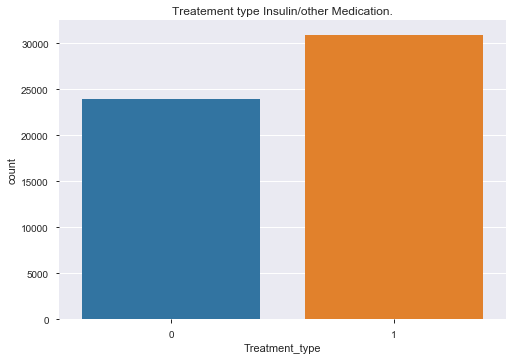

In [79]:
sns.countplot(df_with_med['Treatment_type'])
plt.title("Treatement type Insulin/other Medication.")
plt.show()

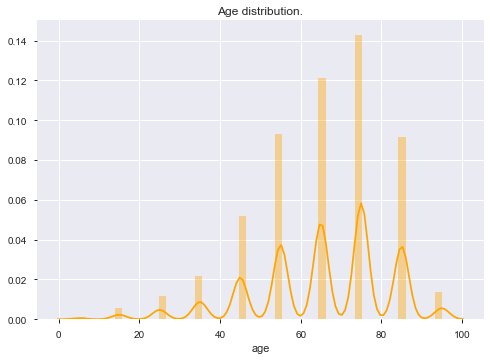

In [142]:
sns.distplot(df_with_med['age'], color = 'ORANGE')
plt.title('Age distribution.')
plt.show()

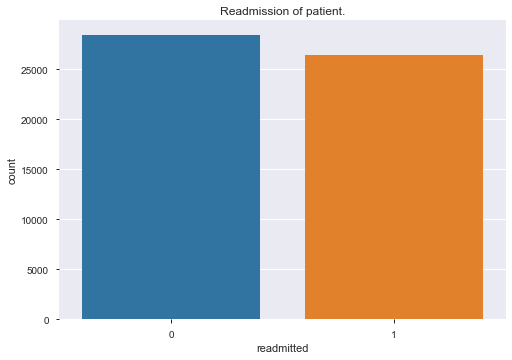

In [81]:
sns.countplot(df_with_med['readmitted'])
plt.title('Readmission of patient.')
plt.show()

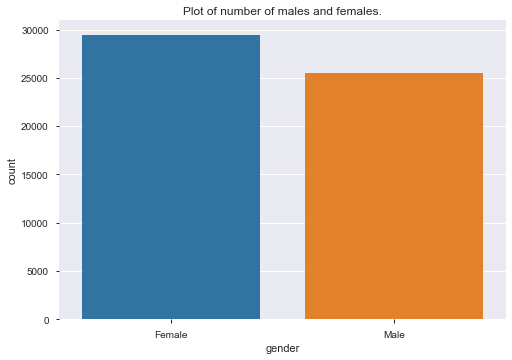

In [82]:
sns.countplot(df_with_med['gender'])
plt.title('Plot of number of males and females.')
plt.show()

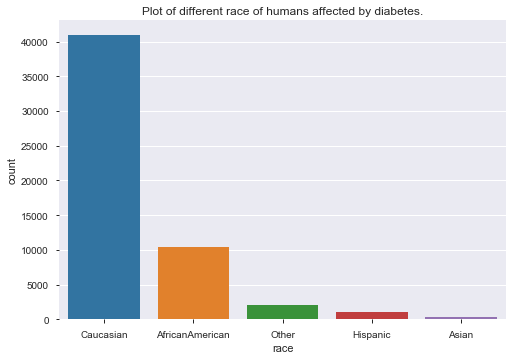

In [83]:
sns.countplot(df_with_med['race'])
plt.title('Plot of different race of humans affected by diabetes.')
plt.show()

In [114]:
df_with_med.groupby(['change'])['change'].count().to_frame()

,change
change,
0,31352
1,23591


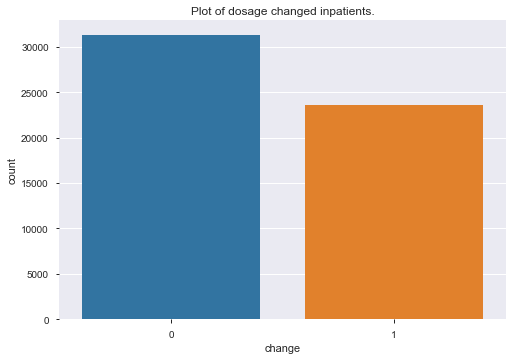

In [107]:
ax = sns.countplot(df_with_med['change'])

#ax.text(0.001,25000, s = '23591')
plt.title('Plot of dosage changed inpatients.')
plt.show()

In [116]:
df = df_with_med.groupby('patient_nbr')['encounter_id'].count()

patient_nbr
135     1
729     1
774     1
927     1
1152    5
Name: encounter_id, dtype: int64

In [131]:
df_with_med['diag_1'].unique()

array(['Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders',
       'Complications of Pregnancy, Childbirth, and the Puerperium',
       'Infectious and Parasitic Diseases',
       'Diseases of the Circulatory System',
       'Diseases of the Respiratory System', 'Injury and Poisoning',
       'Diseases of the Skin and Subcutaneous Tissue',
       'Symptoms, Signs and Ill-defined Conditions', 'Neoplasms',
       'Diseases of the Genitourinary System',
       'Diseases of the Musculoskeletal System and Connective Tissue',
       'Diseases of the Digestive System', 'Mental Disorders',
       'Supplementary Classification of External Causes of Injury and Poisoning',
       'Diseases of the Blood and Blood-forming Organs',
       'Diseases of the Nervous System and Sense Organs', 'Others',
       'Congenital Anomalies'], dtype=object)

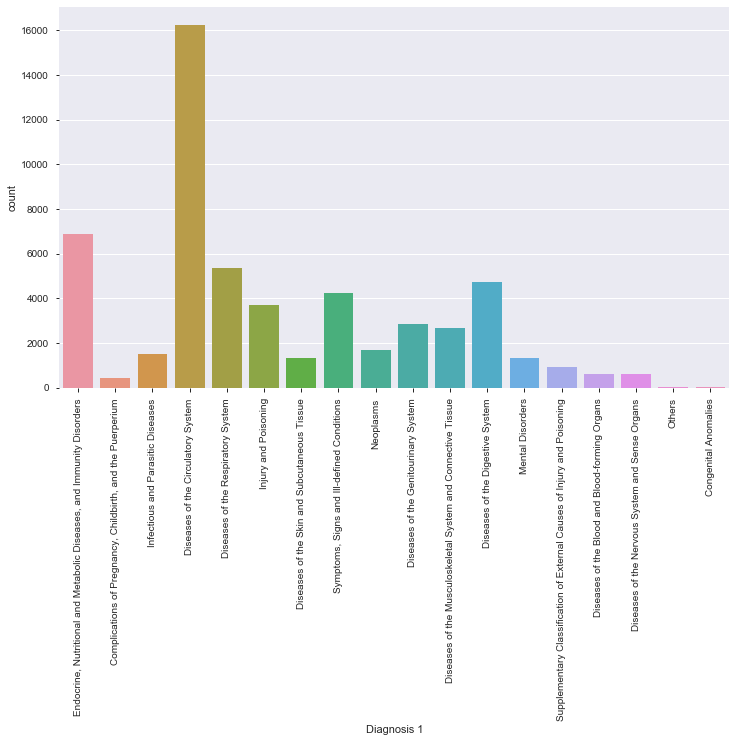

In [136]:
f, ax = plt.subplots(figsize = (12,7))
sns.countplot(df_with_med['diag_1'])
plt.xticks(rotation = 90)
#plt.legend(title = 'Diagnosis', loc = 'upper right', labels = ['A','B'])
plt.xlabel('Diagnosis 1')
plt.show()

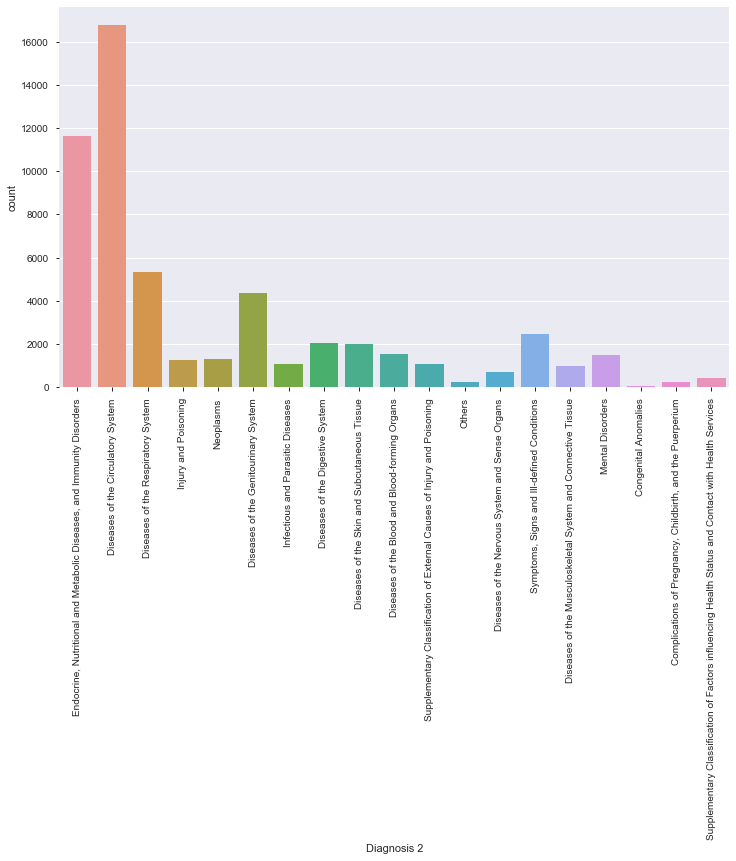

In [140]:
f, ax = plt.subplots(figsize = (12,7))
sns.countplot(df_with_med['diag_2'])
plt.xticks(rotation = 90)
plt.xlabel('Diagnosis 2')
plt.show()

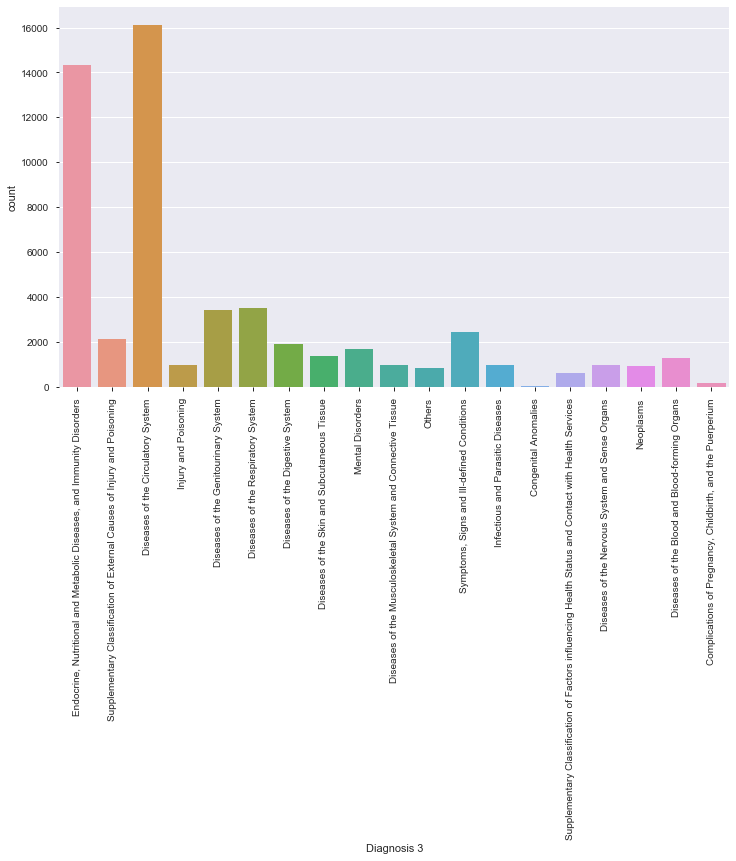

In [139]:
f, ax = plt.subplots(figsize = (12,7))
sns.countplot(df_with_med['diag_3'])
plt.xticks(rotation = 90)
plt.xlabel('Diagnosis 3')
plt.show()

In [152]:
df = df_with_med.groupby(['age'])['Treatment_type'].sum().to_frame()

In [157]:
df.reset_index(inplace = True)
df

,index,age,Treatment_type
0,0,5,133
1,1,15,544
2,2,25,1054
3,3,35,1622
4,4,45,3309
5,5,55,5256
6,6,65,6491
7,7,75,7085
8,8,85,4697
9,9,95,774


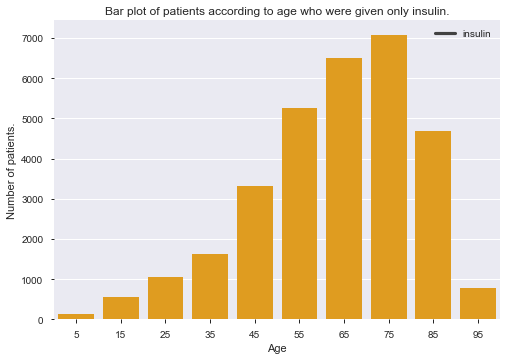

In [162]:
sns.barplot(df['age'], df['Treatment_type'], color = 'ORANGE')
plt.title('Bar plot of patients according to age who were given only insulin.')
plt.legend(labels = ['insulin'])
plt.ylabel('Number of patients.')
plt.xlabel('Age')
plt.show()

In [169]:
df = df_with_med.groupby(['age','Treatment_type'])['Treatment_type'].sum()

### Building Models

In [171]:
df_with_med.head()

,encounter_id,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,patient_nbr,race,gender,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,Treatment_type
1,149190,0,0,1,1,Yes,1,55629189,Caucasian,0,...,0,"Endocrine, Nutritional and Metabolic Diseases,...","Endocrine, Nutritional and Metabolic Diseases,...","Endocrine, Nutritional and Metabolic Diseases,...",9,1,1,7,3,1
2,64410,0,0,0,0,Yes,0,86047875,AfricanAmerican,0,...,1,"Complications of Pregnancy, Childbirth, and th...","Endocrine, Nutritional and Metabolic Diseases,...",Supplementary Classification of External Cause...,6,1,1,7,2,0
3,500364,0,0,1,1,Yes,0,82442376,Caucasian,1,...,0,Infectious and Parasitic Diseases,"Endocrine, Nutritional and Metabolic Diseases,...",Diseases of the Circulatory System,7,1,1,7,2,1
5,35754,0,0,1,0,Yes,1,82637451,Caucasian,1,...,0,Diseases of the Circulatory System,Diseases of the Circulatory System,"Endocrine, Nutritional and Metabolic Diseases,...",9,2,1,2,3,1
7,63768,0,0,0,0,Yes,1,114882984,Caucasian,1,...,0,Diseases of the Circulatory System,Diseases of the Respiratory System,"Endocrine, Nutritional and Metabolic Diseases,...",8,1,1,7,5,0


In [207]:
from sklearn.preprocessing import LabelEncoder

In [228]:
le = LabelEncoder()
df_with_med['diag_1'] = le.fit_transform(df_with_med['diag_1'])

In [229]:
le = LabelEncoder()
df_with_med['diag_2'] = le.fit_transform(df_with_med['diag_2'])

In [230]:
le = LabelEncoder()
df_with_med['diag_3'] = le.fit_transform(df_with_med['diag_3'])

In [231]:
df_diag_1_dummies = pd.get_dummies(df_with_med['diag_1'], prefix = 'diag_1_', drop_first = True)

In [232]:
df_diag_2_dummies = pd.get_dummies(df_with_med['diag_2'], prefix = 'diag_2_', drop_first = True)

In [233]:
df_diag_3_dummies = pd.get_dummies(df_with_med['diag_3'], prefix = 'diag_3_', drop_first = True)

In [234]:
le = LabelEncoder()
df_with_med['race'] = le.fit_transform(df_with_med['race'])

In [235]:
df_race_dummies = pd.get_dummies(df_with_med['race'], prefix = 'race_', drop_first = True)

In [236]:
df_concat = pd.concat([df_with_med, df_race_dummies, df_diag_1_dummies, df_diag_2_dummies, df_diag_3_dummies], join = 'outer',axis = 1,
                     sort = False)

In [257]:
df_concat.drop(['diabetesMed'], axis = 1, inplace = True)

In [240]:
df_concat.drop(['race', 'diag_1', 'diag_2', 'diag_3', 'diabetesMed'], axis = 1, inplace = True)

In [242]:
df_concat.head().T

,1,2,3,5,7
encounter_id,149190,64410,500364,35754,63768
max_glu_serum,0,0,0,0,0
A1Cresult,0,0,0,0,0
insulin,1,0,1,1,0
change,1,0,1,0,0
diabetesMed,Yes,Yes,Yes,Yes,Yes
readmitted,1,0,0,1,1
patient_nbr,55629189,86047875,82442376,82637451,114882984
gender,0,0,1,1,1
age,15,25,35,55,75


In [243]:
df_concat.columns

Index(['encounter_id', 'max_glu_serum', 'A1Cresult', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'patient_nbr', 'gender', 'age',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'Treatment_type', 'race__1',
       'race__2', 'race__3', 'race__4', 'diag_1__1', 'diag_1__2', 'diag_1__3',
       'diag_1__4', 'diag_1__5', 'diag_1__6', 'diag_1__7', 'diag_1__8',
       'diag_1__9', 'diag_1__10', 'diag_1__11', 'diag_1__12', 'diag_1__13',
       'diag_1__14', 'diag_1__15', 'diag_1__16', 'diag_1__17', 'diag_2__1',
       'diag_2__2', 'diag_2__3', 'diag_2__4', 'diag_2__5', 'diag_2__6',
       'diag_2__7', 'diag_2__8', 'diag_2__9', 'diag_2__10', 'diag_2__11',
       'diag_2__12', 'diag_2__13', 'diag_2__14', 'diag_2__15', 'diag_2__16',
       'diag_2__17', 'diag_2__18', 'diag_3_

In [258]:
X = df_concat.drop(['Treatment_type'], axis = 1)
y = df_concat['Treatment_type']

In [262]:
X.shape

(54943, 77)

In [263]:
y.shape

(54943,)

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [266]:
X_train.shape

(38460, 77)

In [289]:
l_model = LogisticRegressionCV(max_iter=1, Cs=10, solver='newton-cg')
l_model.fit(X_train, y_train)    
y_pred = l_model.predict(X_test)
print("Model accuracy is -- ",accuracy_score(y_test, y_pred))

Model accuracy is --  0.9380573924649639
